In [5]:
#from shutil import copy
#from shutil import copyfile
import os
#import sys
import cv2 as cv2
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
from os import walk
#import IPython
#IPython.embed() # to debug in notebook
import random
print("Successfully imported all")

Successfully imported all


In [2]:
cwd = os.getcwd()
print("CWD: ", cwd)
annotations_dir = "/root/atlas_root/teams/team-1/Datasets/CULane_Dataset/laneseg_label_w16/"
annotations_dir_old = "/root/atlas_root/teams/team-1/Datasets/CULane_Dataset/laneseg_label_w16_OLD_LABELS/"
annotation_paths = []
annotation_paths_old = []   
for r, d, files in os.walk(annotations_dir):
    for file in files:
        annotation_paths.append(os.path.join(r, file))
for r, d, files in os.walk(annotations_dir_old):
    for file in files:
        annotation_paths_old.append(os.path.join(r, file))
        
print("Number of annotations total: ", len(annotation_paths), sep="")
print("Number of old annotations total: ", len(annotation_paths_old), sep="")

CWD:  /root/atlas_root/home/cjcramer/lane_lines/Scripts
Number of annotations total: 98877
Number of old annotations total: 98877


In [136]:
index = random.randint(1, len(annotation_paths))
print(index)
print(annotation_paths[index])
tok = annotation_paths[index].split("/")
tok.remove("laneseg_label_w16")
actual_img_path = "/".join(tok)[:-3] + "jpg"
print(actual_img_path)

96225
/root/atlas_root/teams/team-1/Datasets/CULane_Dataset/laneseg_label_w16/driver_23_30frame/05160714_0442.MP4/02475.png
/root/atlas_root/teams/team-1/Datasets/CULane_Dataset/driver_23_30frame/05160714_0442.MP4/02475.jpg


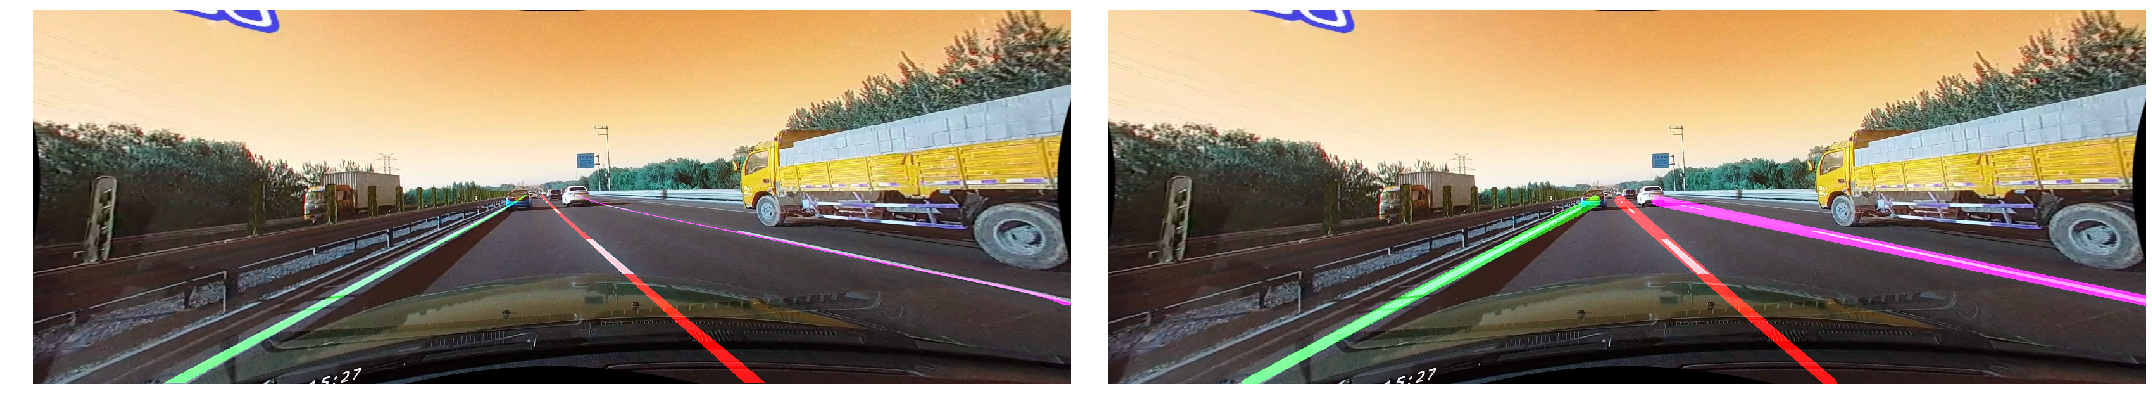

In [137]:
plt.rcParams["figure.figsize"] = (30,10)
img = cv2.imread(annotation_paths[index], cv2.IMREAD_GRAYSCALE)
img_old = cv2.imread(annotation_paths_old[index], cv2.IMREAD_GRAYSCALE)
img_real = cv2.imread(actual_img_path, cv2.IMREAD_COLOR)


img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
img[np.where((img == [1]).all(axis = 2))] = [0,0,255]
img[np.where((img == [2]).all(axis = 2))] = [0,160,0]
img[np.where((img == [3]).all(axis = 2))] = [255,0,0]
img[np.where((img == [4]).all(axis = 2))] = [255,0,255]
#img = img * 64
img = cv2.add(img, img_real)

img_old = cv2.cvtColor(img_old, cv2.COLOR_GRAY2RGB)
img_old[np.where((img_old == [1]).all(axis = 2))] = [0,0,255]
img_old[np.where((img_old == [2]).all(axis = 2))] = [0,160,0]
img_old[np.where((img_old == [3]).all(axis = 2))] = [255,0,0]
img_old[np.where((img_old == [4]).all(axis = 2))] = [255,0,255]
#img_old = img_old * 64
img_old = cv2.add(img_old, img_real)


#img = cv2.addWeighted(img, 0.2, img_real, 0.8, 0)
#img = (img) + img_real
#img_old = (img_old * 100) + img_real

#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#img_old = cv2.cvtColor(img_old, cv2.COLOR_BGR2RGB)

f, axs = plt.subplots(1, 2)
for _, ax in np.ndenumerate(axs):   # Remove axes
    ax.axis('off')
axs[0].imshow(img)
axs[1].imshow(img_old)
#axs[2].imshow(img_real)
plt.tight_layout()
plt.show()

In [138]:
save_success = cv2.imwrite(cwd + "/example_lane_good.png", img)
if save_success:
    print("Save good")
else:
    print("FAILED TO SAVE IMAGE")
save_success = cv2.imwrite(cwd + "/example_lane_bad.png", img_old)
if save_success:
    print("Save good")
else:
    print("FAILED TO SAVE IMAGE")

Save good
Save good
